In [1]:
# Parameters
# Refer to injected parameters for any run.ipynb (similar cell below)
fname = 'R1158_FKS2-HS1_single_ortho_dox'

In [2]:
# Parameters
fname = "BY4741_FKS1-HS2_single_ortho_anidulafungin"


# Notebook to generate heatmaps

## Import libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'

## Specify paths

In [4]:
variantdata_path = 'dimsum_output/variant_data/'
processed_data_outpath = 'processed_data/'
aggdata_outpath = 'aggregated_data/'
heatmapdata_outpath = 'heatmaps_data/'
mgraph_outpath = 'manuscript_figures/'

## Get conditions from filename

In [5]:
f = variantdata_path + fname
pos_offset = {'FKS1-HS1': 639,
              'FKS1-HS2': 1353,
              'FKS2-HS1': 659,
              'FKS2-HS2': 1372
             }

In [6]:
cset = f.split('/')[-1].split('_') # Extract conditions from parameter
cset_name = '_'.join(cset) # Basename based on conditions
strain, locus, pool_type, compound = [cset[i] for i in (0,1,2,-1)]
print(f'Strain: {strain}')
print(f'Locus: {locus}')
print(f'Pool type: {pool_type}')
print(f'Compound: {compound}')

Strain: BY4741
Locus: FKS1-HS2
Pool type: single
Compound: anidulafungin


## Import dataframe

In [7]:
withSyndf = pd.read_csv(processed_data_outpath+cset_name+'/selcoeff_all_libraries.csv', index_col=0)
wtaa = withSyndf.loc[withSyndf.WT == True, 'aa_seq'].values[0]
withSyndf

,seq_type,nt_seq,aa_pos,alt_codons,mutated_codon,combination,aa_seq,WT,STOP,STOP_readthrough,...,b3_log10,alt_aa,mutation_type,Log2FC_1,Log2FC_2,Log2FC_3,selcoeff_1,selcoeff_2,selcoeff_3,median_s
0,single,ttttgggtgagacgttatacattg,0.0,ttt,1.0,NaN,FWVRRYTL,NaN,False,False,...,-3.271966,F,non-synonymous,-2.254948,-2.468657,-2.646186,-0.309563,-0.573930,-0.722001,-0.573930
1,single,ttgtgggtgagacgttatacattg,0.0,ttg,1.0,NaN,LWVRRYTL,NaN,False,False,...,-3.936519,L,non-synonymous,-2.147730,-2.345021,-2.390941,-0.202345,-0.450294,-0.466756,-0.450294
2,single,ctttgggtgagacgttatacattg,0.0,ctt,1.0,NaN,LWVRRYTL,NaN,False,False,...,-4.355648,L,non-synonymous,-2.124524,-2.323178,-2.576842,-0.179138,-0.428452,-0.652658,-0.428452
3,single,ctgtgggtgagacgttatacattg,0.0,ctg,1.0,NaN,LWVRRYTL,NaN,False,False,...,-3.811580,L,non-synonymous,-2.417095,-2.444360,-2.309319,-0.471709,-0.549633,-0.385134,-0.471709
4,single,atttgggtgagacgttatacattg,0.0,att,1.0,NaN,IWVRRYTL,NaN,False,False,...,-4.082647,I,non-synonymous,-2.267342,-2.978405,-2.695043,-0.321957,-1.083678,-0.770859,-0.770859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,WT,gattgggtgagacgttatacattg,3.0,aga,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,R,synonymous,0.052415,-0.362905,-0.204382,1.997800,1.531822,1.719803,1.719803
551,WT,gattgggtgagacgttatacattg,4.0,cgt,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,R,synonymous,0.052415,-0.362905,-0.204382,1.997800,1.531822,1.719803,1.719803
552,WT,gattgggtgagacgttatacattg,5.0,tat,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,Y,synonymous,0.052415,-0.362905,-0.204382,1.997800,1.531822,1.719803,1.719803
553,WT,gattgggtgagacgttatacattg,6.0,aca,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,T,synonymous,0.052415,-0.362905,-0.204382,1.997800,1.531822,1.719803,1.719803


## Reshape dataframe

In [8]:
if pool_type == 'single':
    withWTdf = withSyndf[withSyndf.seq_type.isin(['WT','single'])]
else:
    withWTdf = withSyndf[withSyndf.Nham_aa <=1]
withWTdf

,seq_type,nt_seq,aa_pos,alt_codons,mutated_codon,combination,aa_seq,WT,STOP,STOP_readthrough,...,b3_log10,alt_aa,mutation_type,Log2FC_1,Log2FC_2,Log2FC_3,selcoeff_1,selcoeff_2,selcoeff_3,median_s
0,single,ttttgggtgagacgttatacattg,0.0,ttt,1.0,NaN,FWVRRYTL,NaN,False,False,...,-3.271966,F,non-synonymous,-2.254948,-2.468657,-2.646186,-0.309563,-0.573930,-0.722001,-0.573930
1,single,ttgtgggtgagacgttatacattg,0.0,ttg,1.0,NaN,LWVRRYTL,NaN,False,False,...,-3.936519,L,non-synonymous,-2.147730,-2.345021,-2.390941,-0.202345,-0.450294,-0.466756,-0.450294
2,single,ctttgggtgagacgttatacattg,0.0,ctt,1.0,NaN,LWVRRYTL,NaN,False,False,...,-4.355648,L,non-synonymous,-2.124524,-2.323178,-2.576842,-0.179138,-0.428452,-0.652658,-0.428452
3,single,ctgtgggtgagacgttatacattg,0.0,ctg,1.0,NaN,LWVRRYTL,NaN,False,False,...,-3.811580,L,non-synonymous,-2.417095,-2.444360,-2.309319,-0.471709,-0.549633,-0.385134,-0.471709
4,single,atttgggtgagacgttatacattg,0.0,att,1.0,NaN,IWVRRYTL,NaN,False,False,...,-4.082647,I,non-synonymous,-2.267342,-2.978405,-2.695043,-0.321957,-1.083678,-0.770859,-0.770859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,WT,gattgggtgagacgttatacattg,3.0,aga,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,R,synonymous,0.052415,-0.362905,-0.204382,1.997800,1.531822,1.719803,1.719803
551,WT,gattgggtgagacgttatacattg,4.0,cgt,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,R,synonymous,0.052415,-0.362905,-0.204382,1.997800,1.531822,1.719803,1.719803
552,WT,gattgggtgagacgttatacattg,5.0,tat,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,Y,synonymous,0.052415,-0.362905,-0.204382,1.997800,1.531822,1.719803,1.719803
553,WT,gattgggtgagacgttatacattg,6.0,aca,NaN,NaN,DWVRRYTL,True,NaN,NaN,...,NaN,T,synonymous,0.052415,-0.362905,-0.204382,1.997800,1.531822,1.719803,1.719803


### Import validation mutants missing from the dataset (only for BY FKS1-HS1)

In [9]:
rescued_df = pd.read_csv(f'{aggdata_outpath}/validation_DMS_missing_estimates.csv', index_col=0)[['genotype','compound','estimated_s']]
rescued_df.head(8)

,genotype,compound,estimated_s
8,F639C,anidulafungin,2.009071
9,F639C,caspofungin,1.918283
10,F639C,micafungin,1.941420
11,F639C,none,0.122445
32,L640D,anidulafungin,-0.011160
33,L640D,caspofungin,-0.076818
34,L640D,micafungin,0.706536
35,L640D,none,0.060445


### Pivot dataframe

In [10]:
withWTdf_gby = withWTdf.groupby(['alt_aa','aa_pos','nt_seq'])[['median_s']].first().reset_index()

In [11]:
aa_single = withWTdf_gby.groupby(['alt_aa','aa_pos'])[['median_s']].median().reset_index()
aa_single['aa_pos'] = aa_single['aa_pos'].astype(int) + pos_offset[locus]

In [12]:
if (strain == 'BY4741') & (locus == 'FKS1-HS1'):
    rescued_filtered = rescued_df[(rescued_df.compound == compound)
                                  & (rescued_df.genotype.isin(['F639C', 'L640D', 'L642G', 'P647N', 'P647Q']))
                                 ]
    rescued_filtered['wt_aa'], rescued_filtered['aa_pos'], rescued_filtered['alt_aa'] = zip(*rescued_filtered['genotype'].apply(lambda x: [x[0], int(x[1:-1]), x[-1]]))
    rescued_filtered.rename(columns={'estimated_s':'median_s'}, inplace=True)
else:
    rescued_filtered = pd.DataFrame([], columns=['alt_aa','aa_pos','median_s'])

In [13]:
aa_single_complete = pd.concat([aa_single, rescued_filtered[['alt_aa','aa_pos','median_s']]], ignore_index=True)
aa_single_complete.to_csv(f'{heatmapdata_outpath}/{cset_name}.csv')
aa_single_complete

/tmp/ipykernel_3175/1998358398.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aa_single_complete = pd.concat([aa_single, rescued_filtered[['alt_aa','aa_pos','median_s']]], ignore_index=True)


,alt_aa,aa_pos,median_s
0,*,1353,-0.210913
1,*,1355,1.039351
2,*,1356,-0.297354
3,*,1357,-0.340795
4,*,1358,-0.507875
...,...,...,...
127,Y,1356,-0.787072
128,Y,1357,2.692214
129,Y,1358,1.719803
130,Y,1359,1.488529


In [14]:
wide_aa = aa_single_complete.pivot(index='alt_aa', columns='aa_pos', values='median_s')

aa_sort_order = '*PGCQNTSEDKHRWYFMLIVA'
aa_sort_dic = dict(zip(list(aa_sort_order), list(range(0,len(aa_sort_order)))))
wide_aa.sort_index(key=lambda x: x.map(aa_sort_dic), inplace=True)
wide_aa

aa_pos,1353,1354,1355,1356,1357,1358,1359,1360
alt_aa,,,,,,,,
*,-0.210913,NaN,1.039351,-0.297354,-0.340795,-0.507875,-0.297716,-0.414733
P,0.179824,0.559495,3.745097,-0.434051,2.873989,0.144487,1.222922,NaN
G,-0.384879,0.782886,-0.505794,0.780621,NaN,0.061992,NaN,-0.097181
C,-0.177195,NaN,NaN,-0.506951,3.233054,-0.323073,-0.541713,NaN
Q,0.896962,1.222922,-0.299706,2.556126,1.109313,NaN,-0.257243,NaN
N,0.454459,-0.539078,-0.394405,0.964864,2.686917,1.236726,NaN,1.394502
T,0.139347,2.911987,-0.186926,-0.402684,3.398702,NaN,0.193393,-0.502084
S,1.291833,-0.195294,-0.654792,-0.323641,2.248428,0.470188,-0.442576,-0.292990
E,NaN,NaN,NaN,0.600841,NaN,-0.055628,NaN,NaN


## Draw heatmap

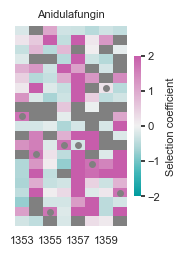

In [15]:
from matplotlib.ticker import MultipleLocator

# Convert conditions to title labels
title_dict = {'none':'Control',
              'dox':'Doxycycline control\n(Paralog repressed)',
              'anidulafungin':'Anidulafungin',
              'caspofungin':'Caspofungin',
              'micafungin':'Micafungin'
             }

# Purge graph space
sns.set(rc = {'figure.figsize':(1.8, 2.6),
              'font.size':8,
              'legend.title_fontsize':8, 'legend.fontsize':8,
              'axes.labelsize':8,'axes.titlesize':8,
              'xtick.labelsize':8, 'ytick.labelsize':8,
             },
       style='whitegrid')
f, ax = plt.subplots()

# Custom color palette
ccmap = sns.color_palette("blend:#009B9E,#42B7B9,#A7D3D4,#F1F1F1,#E4C1D9,#D691C1,#C75DAB", # CARTOColors Tropic
                          as_cmap=True)
ccmap.set_bad('.5') # Color for missing values

# Mask for missing values
mask = pd.isnull(wide_aa)

# Draw heatmap
ax = sns.heatmap(wide_aa, mask=mask, 
                 cmap=ccmap,
                 vmin=-2, center=0, vmax=2,
                 #xticklabels=len(wtaa)-1,
                 xticklabels=2,
                 yticklabels=False,
                 cbar_kws={'label':'Selection coefficient',
                           'shrink':.7
                          }
                )

ax.set_title(title_dict[compound])
ax.set(xlabel=None, ylabel=None)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
ax.tick_params(axis='x', length=3)

cax = ax.figure.axes[-1]
cax.tick_params(length=3, pad=2)

# Coordinates of WT protein sequence on the heatmap are extracted from the dataframe
# Coordinates should be OK even if the dataframe contains missing values
wtcoord_aa = [(i+0.5, list(aa_sort_order).index(v)+0.5) for i,v in enumerate(wtaa)]

for o in wtcoord_aa:
    ax.plot(o[0],o[1], marker='o', color='.5', markersize=4) # displays WT sequence

# Variants for which we inferred the DMS score
#estimate_coord = [(a+0.75-pos_offset[locus], list(aa_sort_order).index(b)+0.25) for a, b in zip(rescued_filtered.aa_pos, rescued_filtered.alt_aa)]

#for m in estimate_coord:
#    ax.plot(m[0],m[1], marker='*', color='.5', markersize=2)

# Graphs are output in the specified folder
plt.savefig(mgraph_outpath+cset_name+'_aa_heatmap_median_s.svg', format='svg', dpi=300)